# Análise de Dados com ML:
## K-Nearest Neighbors (KNN) ou Vizinhos Mais Próximos

## Objetivos

*   Classificar os clientes em grupos de acordo com os serviços fornecidos.


Primeiro uma breve explicação sobre o que é **KNN**?
**K-Nearest Neighbors** é um algoritmo de Machine Learn, onde o dado é 'treinado' com pontos de dados para assim corresponder a uma classificação. Para prever a classificação de um determinado ponto é levado em consideração as classes dos 'K' pontos de dados mais próximos assim é escolhida a classe à qual pertence a maioria dos 'K' pontos mais próximos como a classe prevista.


### Tendo isso em mente, aqui está uma visualização do algoritmo KNN.

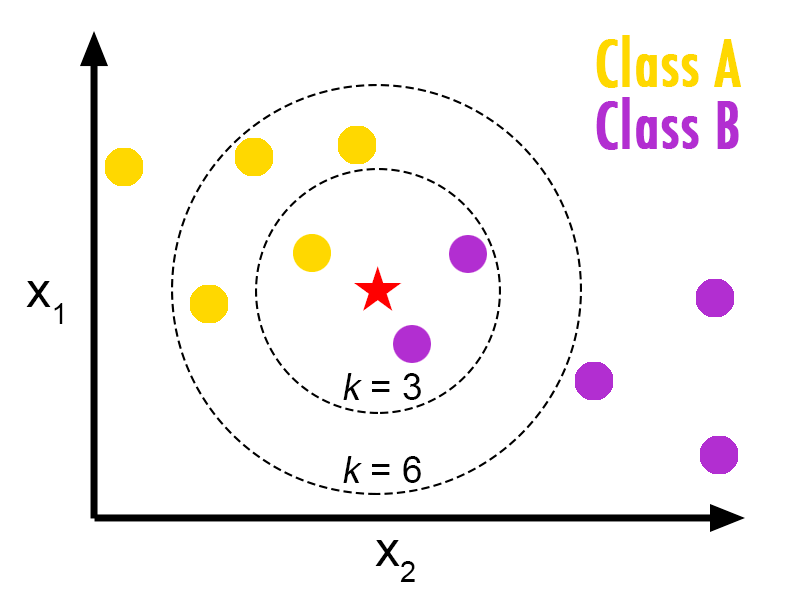


Nesse caso, temos os seguintes pontos de dados: Classe A e B. Queremos prever qual é a estrela (pontos de dados de teste). Se considerarmos o valor de k de 3 (3 ponto de dados mais proximos), obteremos a previsão da classe B. Ainda se considerarmos um valor de 6 do K, obteremos a previsão da Classe A.



Nesse sentido, é importante considerar o valor de K.


Bom! vou sumarizar o conteúdo desse artigo:

<h1>Tabela de Conteúdo</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Sobre o dataset</a></li>
        <li><a href="#visualization_analysis">Análise e Visualização dos Dados</a></li>
        <li><a href="#classification">Classificação</a></li>
    </ol>
</div>
<br>
<hr>


Vamos utilizar a biblioteca scikit-learn para saber mais consulte a documentação [aqui](https://scikit-learn.org/0.21/documentation.html)

In [ ]:
!pip install scikit-learn==0.23.1

Vamos utilizar a biblioteca matplotlib para saber mais consulte a documentação [aqui](https://matplotlib.org/stable/users/index)

In [ ]:
!pip install matplotlib

Carregando as bibliotecas necessárias.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>Sobre o dataset</h2>
</div>


É uma base de clientes segmentado por utilização de serviços, categorizando em quatro grupos, o campo de destino é 'custcat':

1- Serviço Básico
2- Serviço eletrônico
3- Mais Serviço
4- Serviço Total

Os dados concentra-se no uso de dados demográficos, como região, idade e estado civil, para prever padrões de uso.

O objetivo é construir um classificar para prever a classe de casos desconhecidos.

### Carregando dados


Com a biblioteca pandas, vamos dar uma olhadinha nesses dados.


In [41]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Análise e Visualização de Dados</h2> 
</div>


#### Vamos verificar quantas classes tem no dataset


In [42]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

#### 281 Mais serviço, 266 Serviço básico, 236 Total de serviços, and 217 Serviço eletrônico


Vamos criar algumas visualições utilizando tecnicas de EDA:


array([[<Axes: title={'center': 'income'}>]], dtype=object)

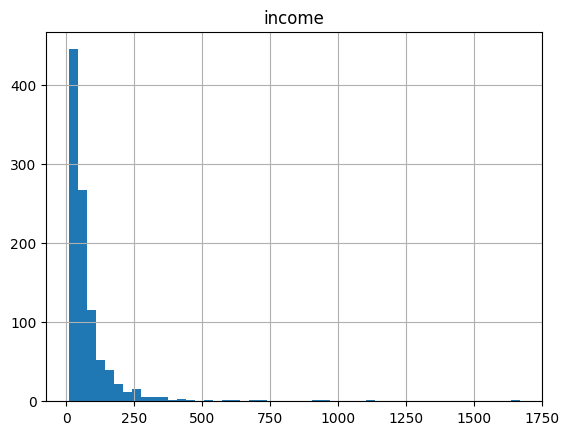

In [43]:
# Utilizando o 'hist' que nada mais é que um histograma, no qual podemos representar a distribuição dos dados.
# bins é a quantidade de compartimentos que o histogram irá utilizar.
df.hist(column='income', bins=50)

### Conjunto de Características.


Vamos definir um conjunto de características, X:


In [44]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Para usar o scikit-learn, temos que converter o dataframe que está no Pandas para um array Numpy:


In [45]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Quais são nossas labels?


In [46]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalizar dados


A padronização de dados fornece média zero e variância unitária aos dados, é uma boa prática, especialmente para algoritmos como KNN, que se baseia na distância dos pontos de dados, para isso, utilizei a função 'StandardScaler':


In [47]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Divisão de Treinamento/Teste

Precisão Fora da Amostra (Out of Sample Accuracy) é a porcentagem de previsões corretas que o modelo faz em dados nos quais o modelo NÃO foi treinado. desse modelo.

É importante que os nossos modelos tenham uma elevada precisão fora da amostra, porque o objectivo de qualquer modelo, claro, é fazer previsões corretas sobre dados desconhecidos. Então, como podemos melhorar a precisão fora da amostra? Uma maneira é usar uma abordagem de avaliação chamada Divisão de Treinamento/Teste (Train Test Split).
A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, treino com o conjunto de treinamento e testa com o conjunto de testes.

Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. É mais realista para os problemas do mundo real.

Entendeu alguma coisa?!! kkk

Em resumo, vamos treinar e testar nossos dados!!

Para isso, pegando uma porção dos dados para teste, nesse caso, 20% (test_size) e o restante 80% para treinamento.


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de Treinamento:', X_train.shape,  y_train.shape)
print ('Conjunto de Teste:', X_test.shape,  y_test.shape)

Conjunto de Treinamento: (800, 11) (800,)
Conjunto de Teste: (200, 11) (200,)


<div id="classification">
    <h2>Classificação</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Importar biblioteca


Implementar a 'votação' dos vizinhos mais próximos.


In [49]:
from sklearn.neighbors import KNeighborsClassifier

### Treinamento

Agora, vou iniciar o algoritmo com k=4:


In [50]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Previsão
É possível usar o modelo para fazer previsões no conjunto de teste:
No último exemplo que fiz o resultado foi '1, 1, 3, 2, 4', ou seja, a previsão para um novo cliente ou cliente desconhecido é de que ele faça parte do 'Serviço Básico'.


In [55]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Avaliação da Precisão

Na classificação multirrótulo, **pontuação de classificação de precisão** é uma função que calcula a precisão do subconjunto. Esta função é igual à função jaccard_score, no qual ele calcula a correspondência entre os rótulos reais e os rótulos previstos no conjunto de teste. Esse conceito é mais conhecimento com métricas de precisão que nesse caso usarei a 'acurácia'. O melhor indício sobre a precisão é que quanto mais próximo de 100% ou 1, é uma boa acurária.

In [58]:
from sklearn import metrics
print("Precisão do conjunto de treinamento: ", metrics.accuracy_score(y_train, neigh.predict(X_train))*100)
print("Precisão do conjunto de teste: ", metrics.accuracy_score(y_test, yhat)*100)

Precisão do conjunto de treinamento:  54.75
Precisão do conjunto de teste:  32.0


## Novamente.
Vou fazer com k=6 e ver os resultados.


In [60]:
k = 3
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
print("Precisão do conjunto de treinamento: ", metrics.accuracy_score(y_train, neigh6.predict(X_train))*100)
print("Precisão do conjunto de teste: ", metrics.accuracy_score(y_test, yhat6)*100)


Precisão do conjunto de treinamento:  56.875
Precisão do conjunto de teste:  31.5


## Conclusão
O estudo aqui foi somente realizar uma classificação com KNN.
A ideia é treinar o modelo com uma parte dos dados e testar a precisão com 
a outra parte. A precisão é a porcentagem de acerto do modelo. 
Por exemplo, se o modelo tem 80% de precisão, isso significa que 80% das previsões do modelo estão corretas. A precisão é um indicador de como o modelo
está se comportando. Se a precisão for alta, o modelo está se comportando bem e se a precisão for baixa, o modelo está se comportando mal. 